In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('data/wilt/training.csv')
test_data = pd.read_csv('data/wilt/testing.csv')

train_data

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193
...,...,...,...,...,...,...
4334,n,111.568773,203.588235,93.264706,403.735294,26.512777
4335,n,125.435240,206.394161,93.058394,512.270073,33.466060
4336,n,132.123859,465.343750,295.333333,499.250000,38.762967
4337,n,124.469536,215.152632,98.484211,675.915789,28.506542


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape

In [4]:
x = ['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR']
y = 'SD_pan'

x_train = train_data[x]
y_train = train_data[y]

x_test = test_data[x]
y_test = test_data[y]

In [5]:
lr = LinearRegression()
lr.fit(x_train, y_train.ravel())

train_pred = lr.predict(x_train)

mape(y_train, train_pred)

239776278975779.44

In [6]:
test_pred = lr.predict(x_test)

mape(y_test, test_pred)

0.38069644247055995

In [7]:
x = 'Mean_Green'
y = 'Mean_Red'

x_train = train_data[x].to_numpy().reshape((-1, 1))
y_train = train_data[y].to_numpy().reshape((-1, 1))

x_test = test_data[x].to_numpy().reshape((-1, 1))
y_test = test_data[y].to_numpy().reshape((-1, 1))

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)

train_pred = lr.predict(x_train)

mape(y_train, train_pred)

0.07601200681747422

In [9]:
test_pred = lr.predict(x_test)

mape(y_test, test_pred)

0.1519586403762143

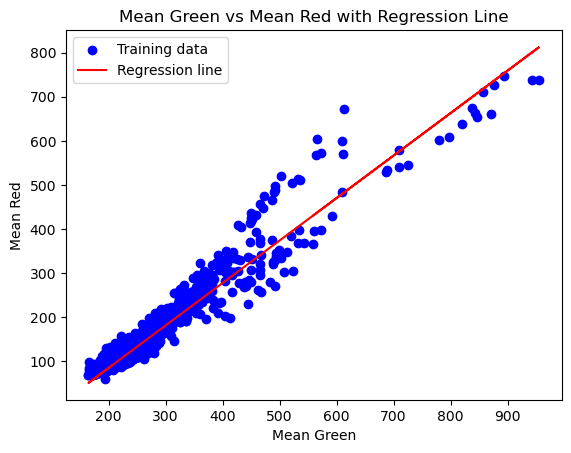

In [10]:
plt.title('Mean Green vs Mean Red with Regression Line')
plt.xlabel('Mean Green')
plt.ylabel('Mean Red')

plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.plot(x_train, train_pred, color='red', label='Regression line')

plt.legend()

plt.show()